In this project I will use daily gym attendance dataset from kaggle that can be found [here](https://www.kaggle.com/datasets/zahranusratt/daily-gym-attendance-and-workout-activity-dataset?resource=download). This dataset contains the daily records of gym members and related information such as visit dates, types of exercises performed, workout duration, and related fitness actions logged during each visit.

Applying 2 supervised learning algorithms 

    1. linear regerssion 
    2. k-nearest neighbor

First import librairas needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Explore the dataset.

In [2]:
# reading gym csv 

gym_df = pd.read_csv("daily_gym_attendance_workout_data.csv")

columns = [i for i in gym_df.columns]

shape = gym_df.shape

print(f"This gym dataset has {shape[0]} rows and {shape[1]} columns. \n\nVariable names are: {columns} ")


This gym dataset has 2600 rows and 10 columns. 

Variable names are: ['member_id', 'visit_date', 'age', 'gender', 'membership_type', 'workout_type', 'workout_duration_minutes', 'calories_burned', 'check_in_time', 'attendance_status'] 


In [3]:
# First few rows
gym_df.head()

,member_id,visit_date,age,gender,membership_type,workout_type,workout_duration_minutes,calories_burned,check_in_time,attendance_status
0,1,2024-10-11,64,Other,Annual,HIIT,28,171,20:04,Absent
1,2,2024-06-01,65,Female,Quarterly,Strength Training,72,650,19:17,Absent
2,3,2024-06-13,45,Male,Quarterly,Cardio,70,633,7:24,Absent
3,4,2024-02-05,35,Female,Monthly,CrossFit,64,362,7:18,Absent
4,5,2024-07-13,26,Female,Quarterly,Yoga,31,262,11:22,Absent


A couple of things I found interesting were looking at calories burned, I wanted to see how calories burned would correlate with the other variables but also, I found some other columns interesting which were gender and membership type. For gender there are 3 categories and I wanted to see if there was a difference in male, female and other if we grouped by that category.

In [4]:

# New dataset without visit date, member ID, and check in. 
gym_df = gym_df[[ 'age', 'gender', 'membership_type', 'workout_type', 'workout_duration_minutes', 'calories_burned']]


In [5]:

gym_df.groupby("membership_type")["gender"].value_counts()

membership_type  gender
Annual           Female    303
                 Male      301
                 Other     299
Monthly          Female    301
                 Other     278
                 Male      277
Quarterly        Other     286
                 Female    282
                 Male      273
Name: count, dtype: int64

In [6]:
for i in gym_df:
    print(gym_df[i].dtype)

int64
str
str
str
int64
int64


In [7]:
# to see if we have any null values

gym_df.isnull().sum()

age                         0
gender                      0
membership_type             0
workout_type                0
workout_duration_minutes    0
calories_burned             0
dtype: int64

This dataset does not have any null values so we can move on to the next step

seperate features and target variables

In [8]:
gym_df.groupby("membership_type")["age"].mean()

membership_type
Annual       42.448505
Monthly      41.280374
Quarterly    42.087990
Name: age, dtype: float64

In [9]:
# Visualization

In this visualization I used a heatmap where we could see what variables were correlated with each other the closer to 1 they are the more correlated they are. We can see that workout duration in minutstes and calories burned were highly corelated at .89

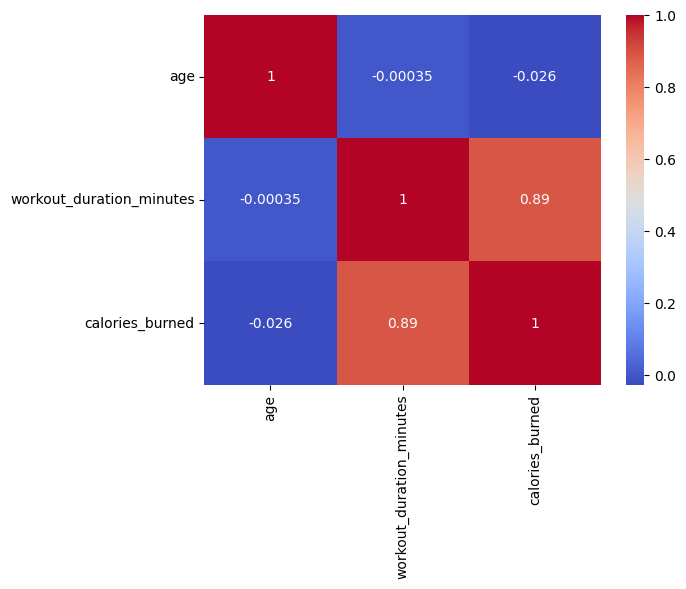

In [10]:
corr = gym_df.select_dtypes(include=["int64", "float64"]).corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

I created another visualisation this is a scatterplot where we visualize the corrlated variables workout duration in minuts and calories burned

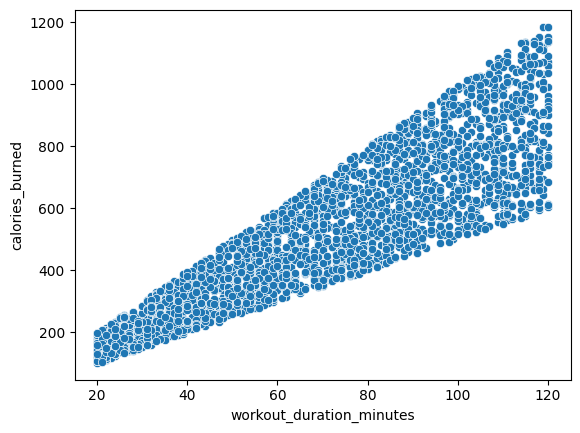

In [11]:
sns.scatterplot(x=gym_df["workout_duration_minutes"], y=gym_df["calories_burned"])
plt.show()

Used get dummies to then use the one hot encoding method so them we can make categorical variables into numbers so the algorithm can understand.

In [12]:
# lets see if any values have a strong correlatoin.

new_df = pd.get_dummies(gym_df)
new_df.corr()

,age,workout_duration_minutes,calories_burned,gender_Female,gender_Male,gender_Other,membership_type_Annual,membership_type_Monthly,membership_type_Quarterly,workout_type_Cardio,workout_type_CrossFit,workout_type_HIIT,workout_type_Strength Training,workout_type_Yoga
age,1.000000,-0.000355,-0.026033,0.028789,-0.001133,-0.027847,0.026380,-0.033713,0.007019,0.005912,0.010338,0.028681,-0.016924,-0.028729
workout_duration_minutes,-0.000355,1.000000,0.888546,-0.019380,-0.006460,0.025943,-0.007425,-0.022668,0.030329,-0.012608,0.011358,-0.036391,0.030604,0.006796
calories_burned,-0.026033,0.888546,1.000000,-0.013735,-0.010416,0.024203,-0.006815,-0.035692,0.042791,-0.009903,0.017811,-0.037474,0.036683,-0.008119
gender_Female,0.028789,-0.019380,-0.013735,1.000000,-0.501512,-0.506777,-0.008035,0.016062,-0.007957,0.022490,-0.000923,0.007709,-0.022696,-0.006636
gender_Male,-0.001133,-0.006460,-0.010416,-0.501512,1.000000,-0.491672,0.009367,-0.005539,-0.003970,0.001243,-0.007436,0.015984,-0.005916,-0.003956
gender_Other,-0.027847,0.025943,0.024203,-0.506777,-0.491672,1.000000,-0.001246,-0.010647,0.011965,-0.023875,0.008339,-0.023686,0.028738,0.010621
membership_type_Annual,0.026380,-0.007425,-0.006815,-0.008035,0.009367,-0.001246,1.000000,-0.511054,-0.504392,-0.024377,-0.017874,-0.003231,-0.012083,0.060623
membership_type_Monthly,-0.033713,-0.022668,-0.035692,0.016062,-0.005539,-0.010647,-0.511054,1.000000,-0.484427,-0.004888,0.007057,-0.008594,0.001913,0.004796
membership_type_Quarterly,0.007019,0.030329,0.042791,-0.007957,-0.003970,0.011965,-0.504392,-0.484427,1.000000,0.029720,0.011102,0.011922,0.010377,-0.066518
workout_type_Cardio,0.005912,-0.012608,-0.009903,0.022490,0.001243,-0.023875,-0.024377,-0.004888,0.029720,1.000000,-0.254082,-0.257491,-0.269511,-0.240966


Here I split the data and chose the target variable as calories burned to then use liner regerssion


In [13]:
from sklearn.model_selection import train_test_split
X = gym_df.drop("calories_burned", axis = 1)
y = gym_df["calories_burned"]
X = pd.get_dummies(X, drop_first = True)


The training data and the test data and set the test size for 20% and random state as 42. Then used linear regression model to find a relationship.

In [14]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#linear regerssion 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.79


Also used mean absolute error to evaluate, lower score is better 

In [16]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", round(mae,2))

Test MAE: 88.74


In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#linear regerssion 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:

# importing KNN
from sklearn.neighbors import KNeighborsClassifier

# 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



x_new = np.array([[65,	72,	False,	False,	False,	True,	False,	False,	True,	False ]])
prediction = knn.predict(x_new)



prediction = knn.predict(x_new)
print("Predicted value:", prediction[0])
print("Train R2:", knn.score(X_train, y_train))
print("Test R2:", knn.score(X_test, y_test))


Predicted value: 736
Train R2: 0.19038461538461537
Test R2: 0.0


Linear regression did much better having a test and training score of .79 while KNN did not perform only explaining 19% of the variance.